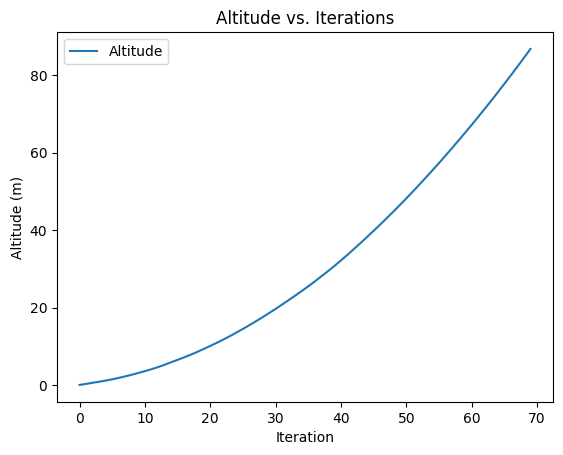

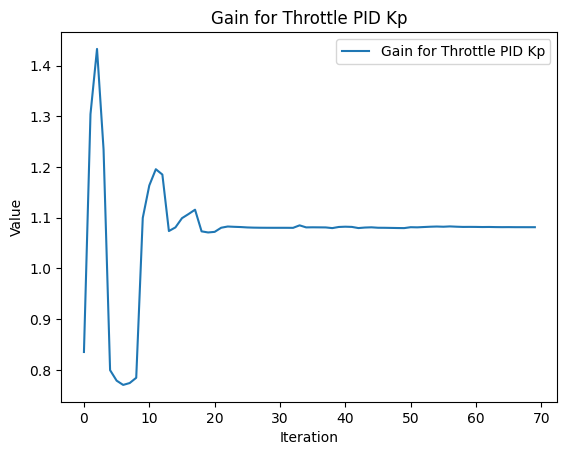

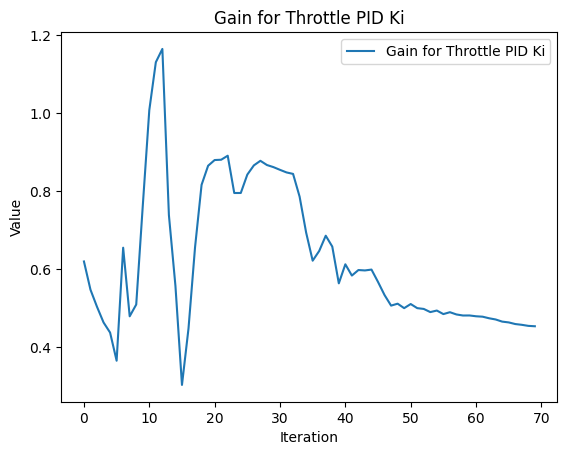

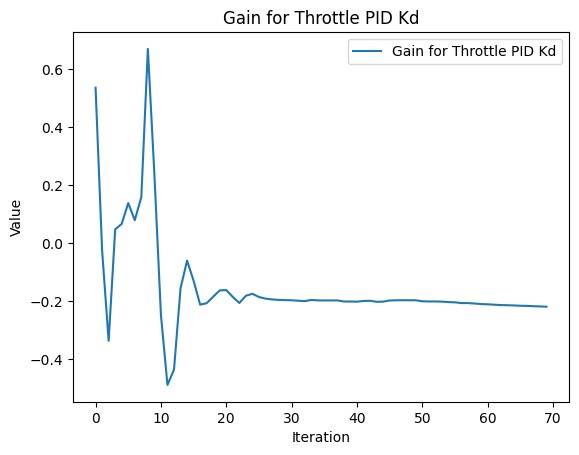

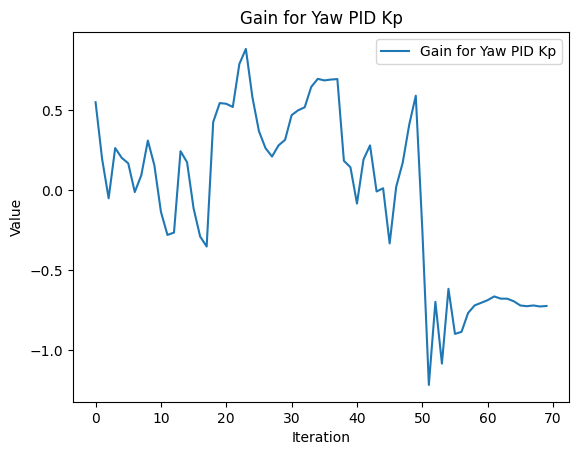

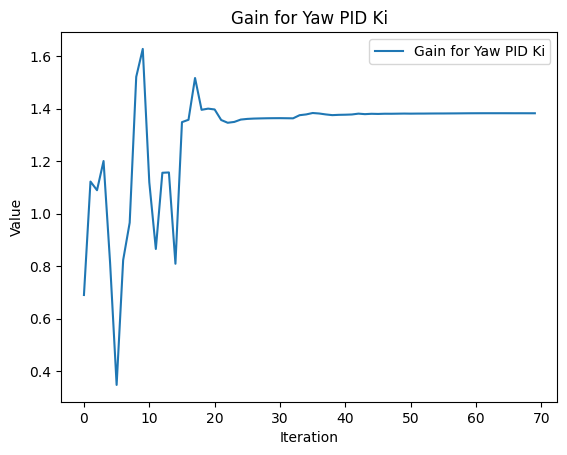

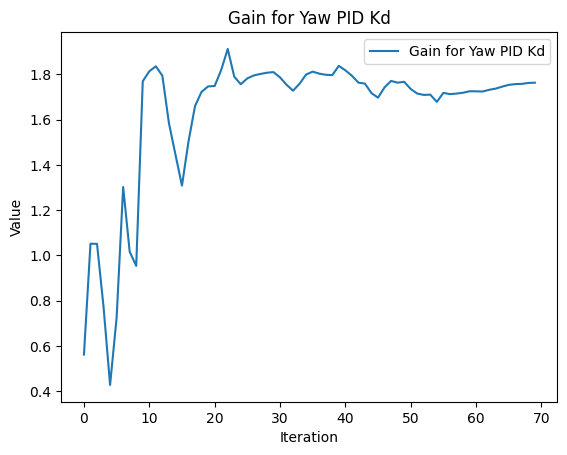

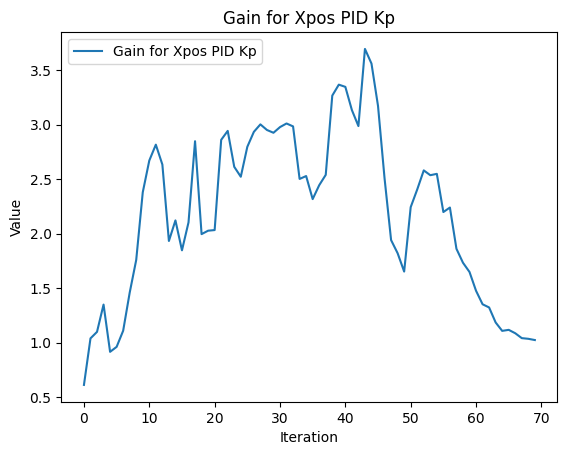

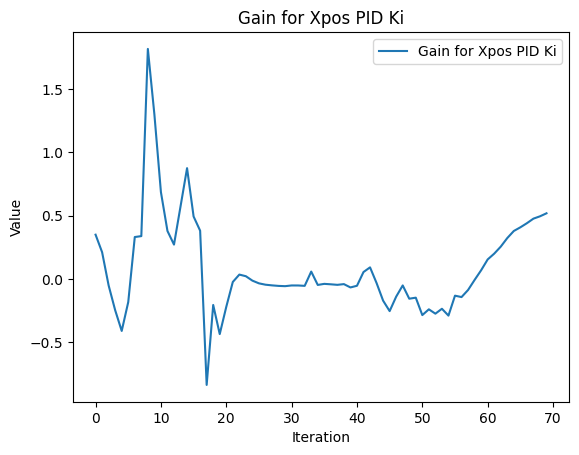

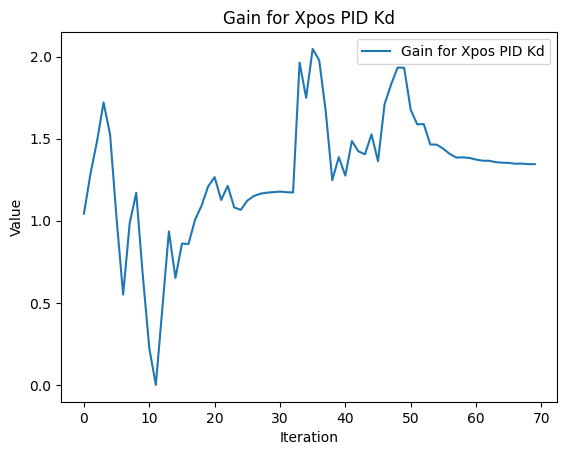

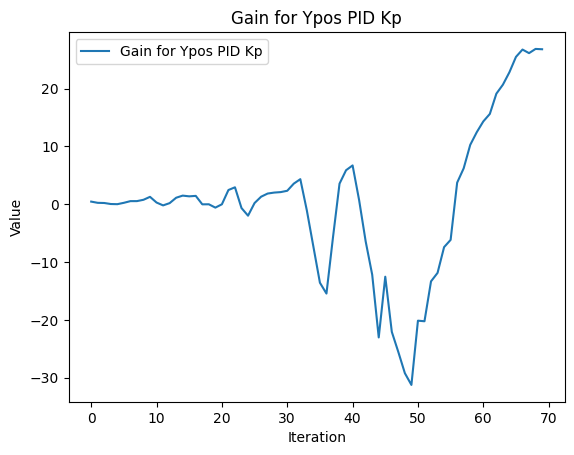

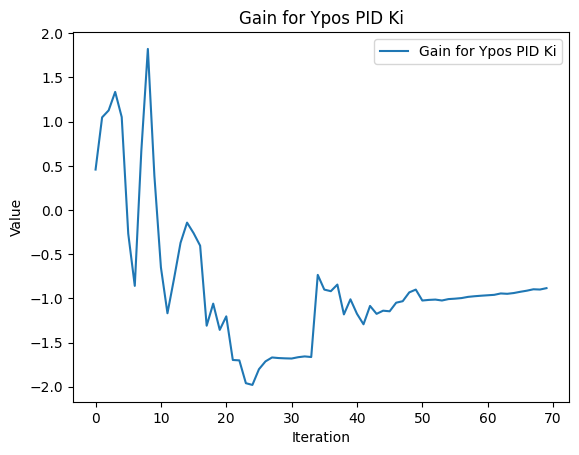

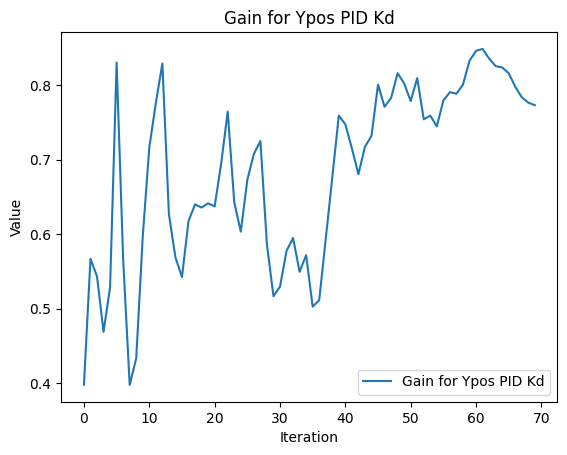

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for PSO
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient
num_particles = 5  # Number of particles in the swarm

# Simulation parameters
iterations = 70
dt = 0.1  # Time step
altitude_setpoint = 3.0  # Desired altitude in meters

# Initialize PSO particles for 12 parameters
np.random.seed(42)
pid_params = np.random.rand(num_particles, 12)  # Random initialization of PID parameters
velocities = np.random.rand(num_particles, 12)  # Random initial velocities
personal_best = pid_params.copy()
global_best = pid_params[np.argmin(np.sum(pid_params, axis=1))]

# Initialize histories
parameter_histories = {f"param_{i}": [] for i in range(12)}
altitude_history = []

# Dynamics variables
altitude = 0.0
velocity = 0.0
acceleration = 0.0
error_integral = 0.0
previous_error = 0.0

# Cost function for PSO (Mean Squared Error)
def cost_function(pid_params):
    Kp, Ki, Kd = pid_params[0], pid_params[1], pid_params[2]
    error = altitude_setpoint - altitude
    integral = error_integral + error * dt
    derivative = (error - previous_error) / dt
    pid_output = Kp * error + Ki * integral + Kd * derivative
    return np.abs(pid_output - altitude_setpoint)

# Simulate PID updates with PSO
for t in range(iterations):
    # Update system state
    error = altitude_setpoint - altitude
    error_integral += error * dt
    error_derivative = (error - previous_error) / dt

    # Calculate PID output using global_best parameters
    throttle_pid = global_best[:3]  # [Kp, Ki, Kd] for Throttle
    pid_output = (
        throttle_pid[0] * error +
        throttle_pid[1] * error_integral +
        throttle_pid[2] * error_derivative
    )

    # Update system dynamics (simple model)
    acceleration = pid_output
    velocity += acceleration * dt
    altitude += velocity * dt
    altitude_history.append(altitude)

    # PSO updates
    for i in range(num_particles):
        # Update velocity and position
        r1, r2 = np.random.rand(12), np.random.rand(12)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best[i] - pid_params[i])
            + c2 * r2 * (global_best - pid_params[i])
        )
        pid_params[i] += velocities[i]

        # Evaluate cost and update personal/global bests
        cost = cost_function(pid_params[i])
        if cost < cost_function(personal_best[i]):
            personal_best[i] = pid_params[i]
        if cost < cost_function(global_best):
            global_best = pid_params[i]

    # Log parameters
    for i in range(12):
        parameter_histories[f"param_{i}"].append(global_best[i])

# Plot Altitude Response
plt.figure()
plt.plot(range(iterations), altitude_history, label="Altitude")
plt.xlabel("Iteration")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs. Iterations")
plt.legend()
plt.show()

for i in range(12):
    plt.figure()
    plt.plot(range(iterations), parameter_histories[f"param_{i}"], label=parameter_names[i])
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title(parameter_names[i])
    plt.legend()
    plt.show()


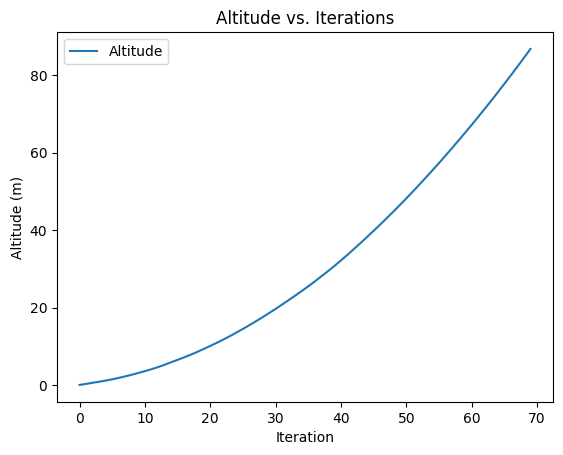

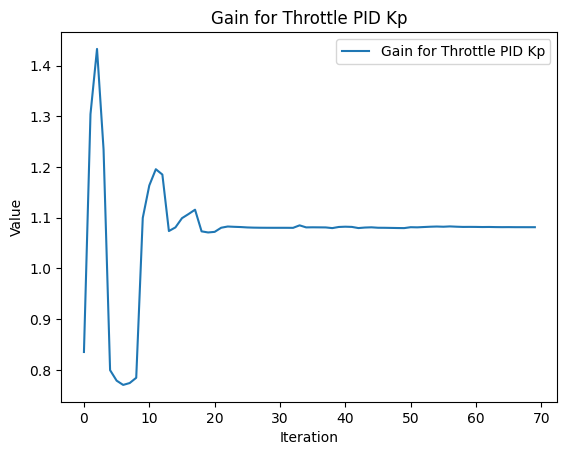

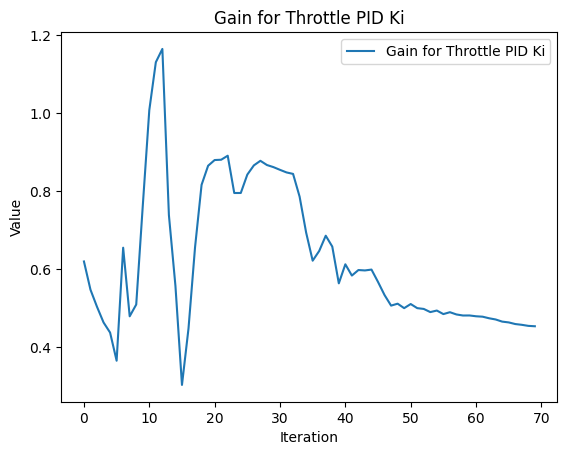

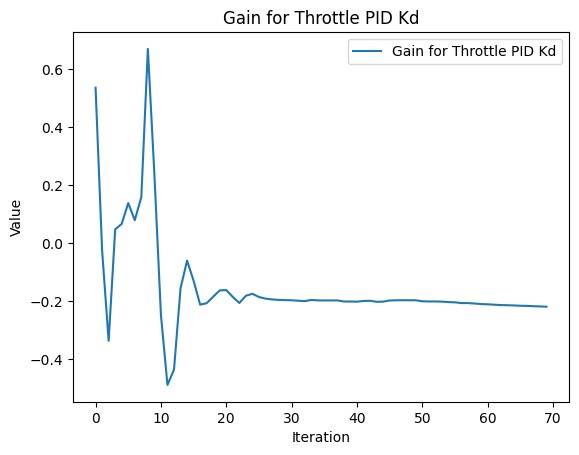

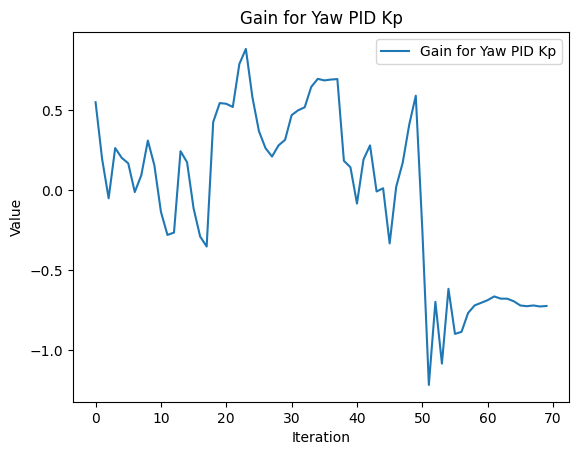

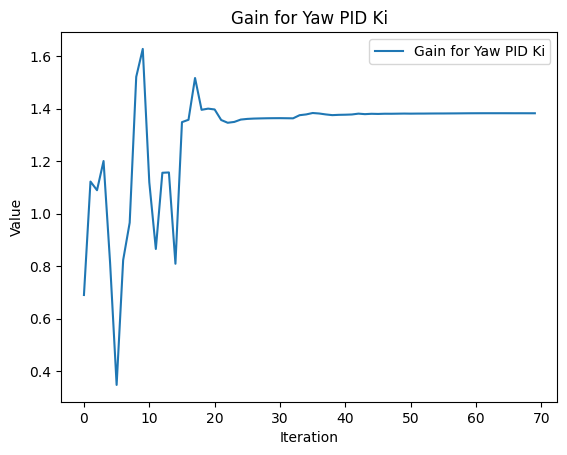

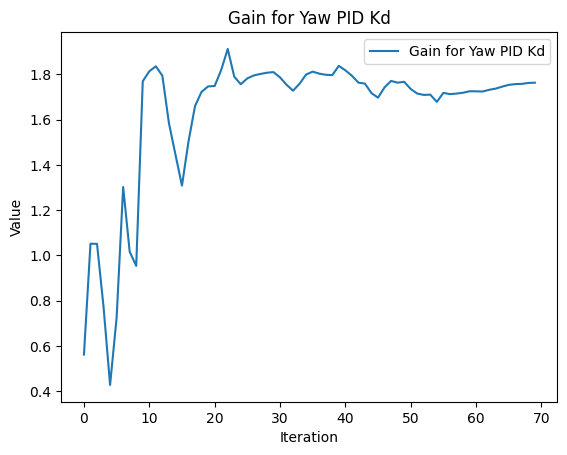

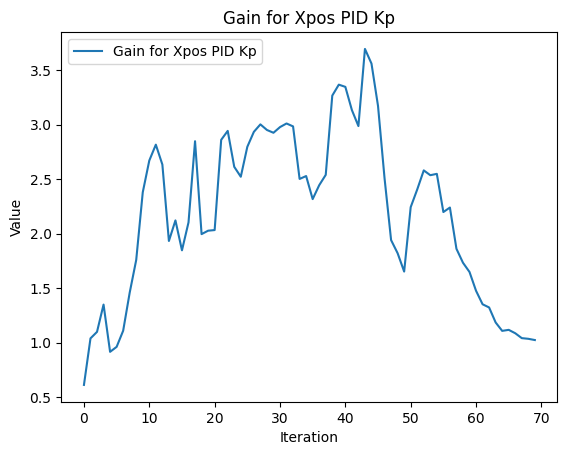

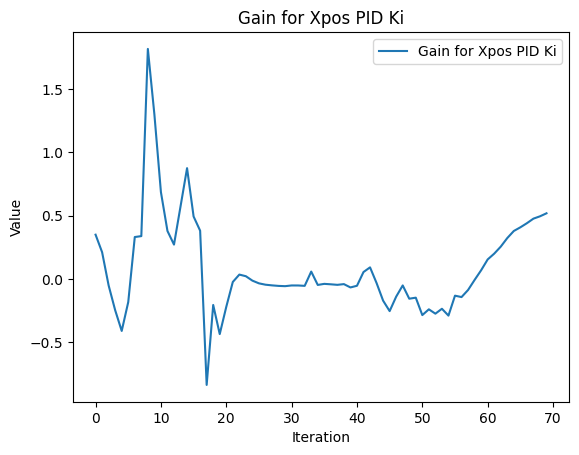

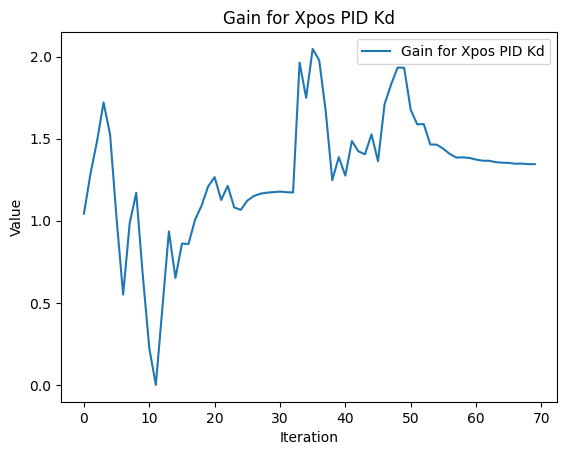

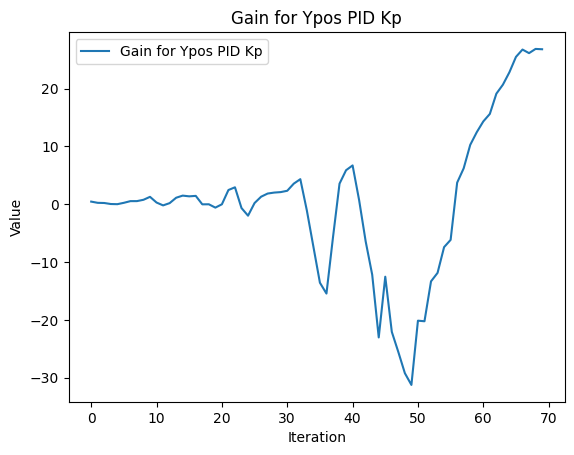

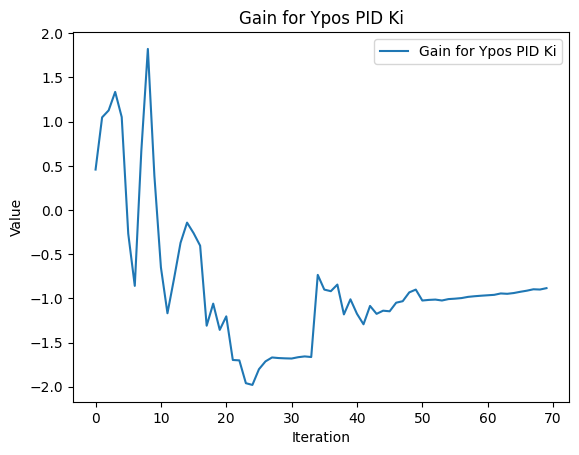

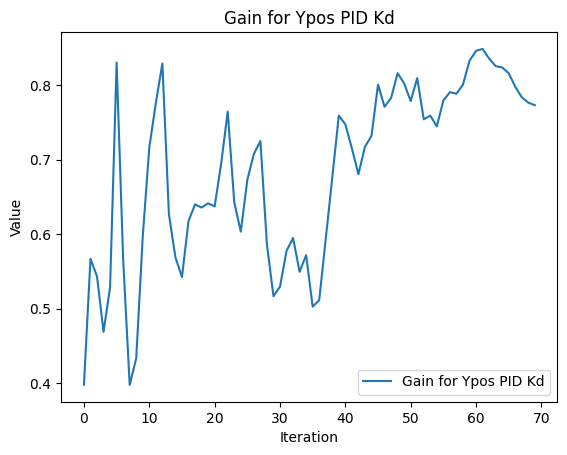

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for PSO
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient
num_particles = 5  # Number of particles in the swarm

# Simulation parameters
iterations = 70
dt = 0.1  # Time step
altitude_setpoint = 3.0  # Desired altitude in meters

# Initialize PSO particles for 12 parameters
np.random.seed(42)
pid_params = np.random.rand(num_particles, 12)  # Random initialization of PID parameters
velocities = np.random.rand(num_particles, 12)  # Random initial velocities
personal_best = pid_params.copy()
global_best = pid_params[np.argmin(np.sum(pid_params, axis=1))]

# Initialize histories
parameter_histories = {f"param_{i}": [] for i in range(12)}
altitude_history = []

# Dynamics variables
altitude = 0.0
velocity = 0.0
acceleration = 0.0
error_integral = 0.0
previous_error = 0.0

# Cost function for PSO (Mean Squared Error)
def cost_function(pid_params):
    Kp, Ki, Kd = pid_params[0], pid_params[1], pid_params[2]
    error = altitude_setpoint - altitude
    integral = error_integral + error * dt
    derivative = (error - previous_error) / dt
    pid_output = Kp * error + Ki * integral + Kd * derivative
    return np.abs(pid_output - altitude_setpoint)

# Simulate PID updates with PSO
for t in range(iterations):
    # Update system state
    error = altitude_setpoint - altitude
    error_integral += error * dt
    error_derivative = (error - previous_error) / dt

    # Calculate PID output using global_best parameters
    throttle_pid = global_best[:3]  # [Kp, Ki, Kd] for Throttle
    pid_output = (
        throttle_pid[0] * error +
        throttle_pid[1] * error_integral +
        throttle_pid[2] * error_derivative
    )

    # Update system dynamics (simple model)
    acceleration = pid_output
    velocity += acceleration * dt
    altitude += velocity * dt
    altitude_history.append(altitude)

    # PSO updates
    for i in range(num_particles):
        # Update velocity and position
        r1, r2 = np.random.rand(12), np.random.rand(12)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best[i] - pid_params[i])
            + c2 * r2 * (global_best - pid_params[i])
        )
        pid_params[i] += velocities[i]

        # Evaluate cost and update personal/global bests
        cost = cost_function(pid_params[i])
        if cost < cost_function(personal_best[i]):
            personal_best[i] = pid_params[i]
        if cost < cost_function(global_best):
            global_best = pid_params[i]

    # Log parameters
    for i in range(12):
        parameter_histories[f"param_{i}"].append(global_best[i])

# Plot Altitude Response
plt.figure()
plt.plot(range(iterations), altitude_history, label="Altitude")
plt.xlabel("Iteration")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs. Iterations")
plt.legend()
plt.show()

# Plot each PID Parameter in separate plots
parameter_names = [
    "Gain for Throttle PID Kp", "Gain for Throttle PID Ki", "Gain for Throttle PID Kd",
    "Gain for Yaw PID Kp", "Gain for Yaw PID Ki", "Gain for Yaw PID Kd",
    "Gain for Xpos PID Kp", "Gain for Xpos PID Ki", "Gain for Xpos PID Kd",
    "Gain for Ypos PID Kp", "Gain for Ypos PID Ki", "Gain for Ypos PID Kd"
]

for i in range(12):
    plt.figure()
    plt.plot(range(iterations), parameter_histories[f"param_{i}"], label=parameter_names[i])
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title(parameter_names[i])
    plt.legend()
    plt.show()


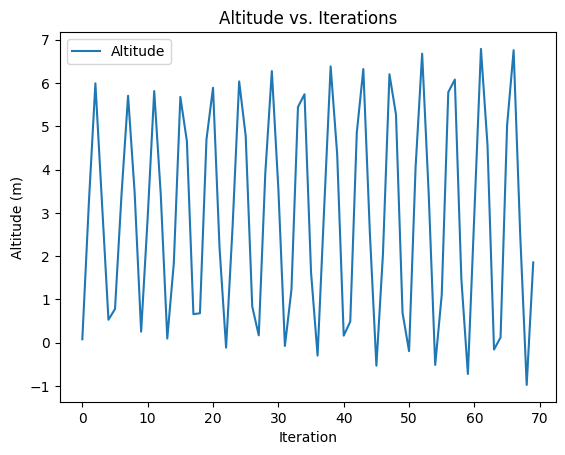

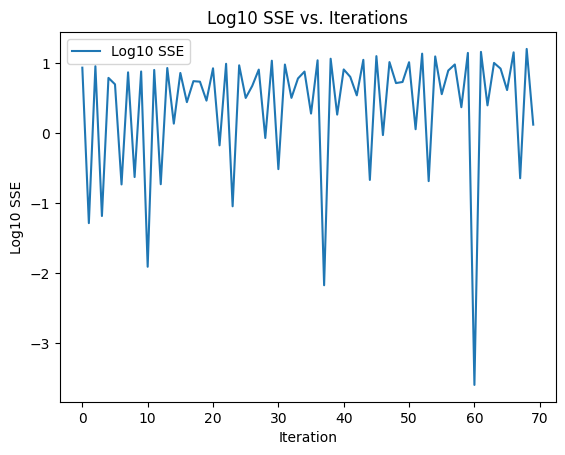

Tuned-Average Values for 12 Parameters:
Gain for Throttle PID Kp: 1.0828
Gain for Throttle PID Ki: 0.9691
Gain for Throttle PID Kd: 0.8202
Gain for Yaw PID Kp: 0.8199
Gain for Yaw PID Ki: 1.6228
Gain for Yaw PID Kd: 0.5350
Gain for Xpos PID Kp: 0.9700
Gain for Xpos PID Ki: -1.0781
Gain for Xpos PID Kd: 1.1083
Gain for Ypos PID Kp: 0.3305
Gain for Ypos PID Ki: -0.8140
Gain for Ypos PID Kd: 1.8290

Global-Best Values for 12 Parameters:
Gain for Throttle PID Kp: 1.0828
Gain for Throttle PID Ki: 0.9689
Gain for Throttle PID Kd: 0.8201
Gain for Yaw PID Kp: 0.8199
Gain for Yaw PID Ki: 1.6229
Gain for Yaw PID Kd: 0.5350
Gain for Xpos PID Kp: 0.9700
Gain for Xpos PID Ki: -1.0808
Gain for Xpos PID Kd: 1.1083
Gain for Ypos PID Kp: 0.3305
Gain for Ypos PID Ki: -0.8150
Gain for Ypos PID Kd: 1.8289


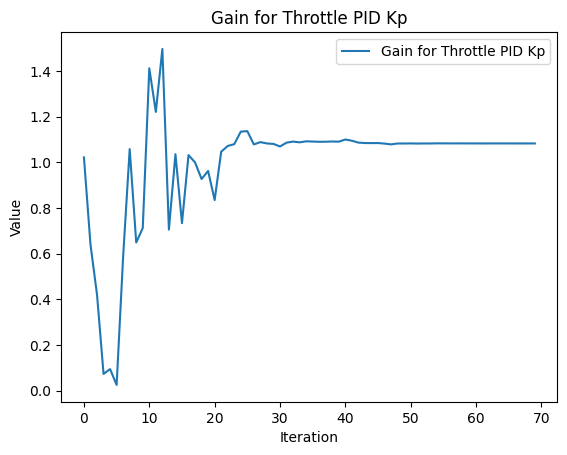

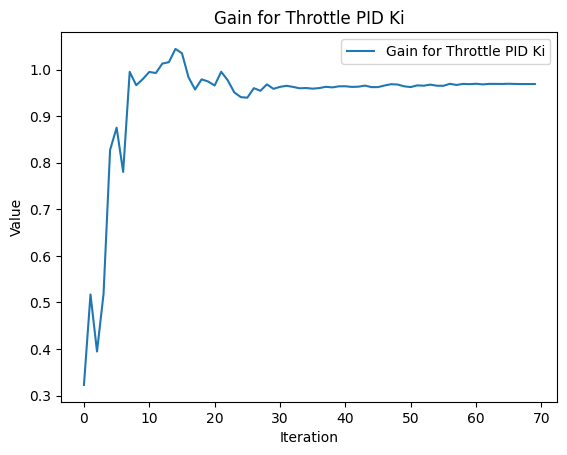

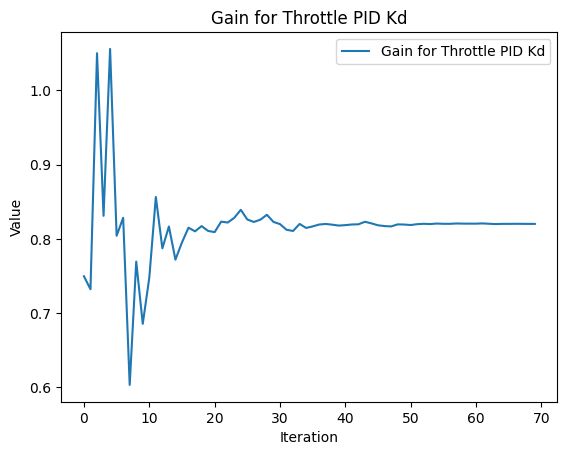

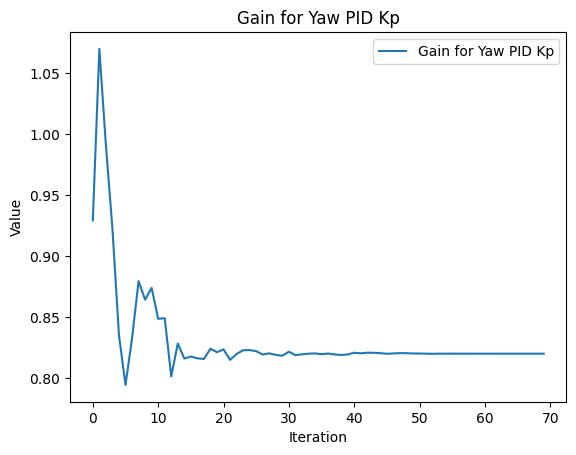

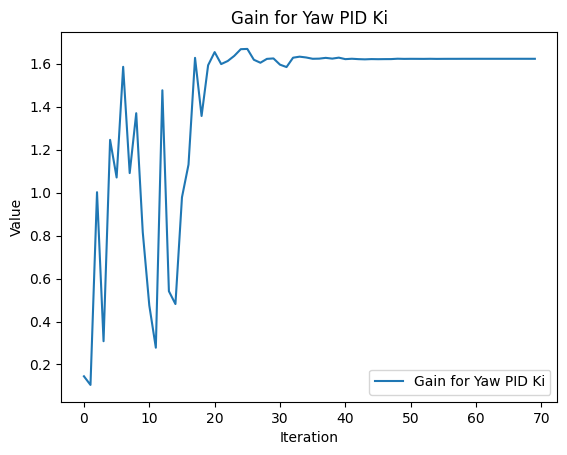

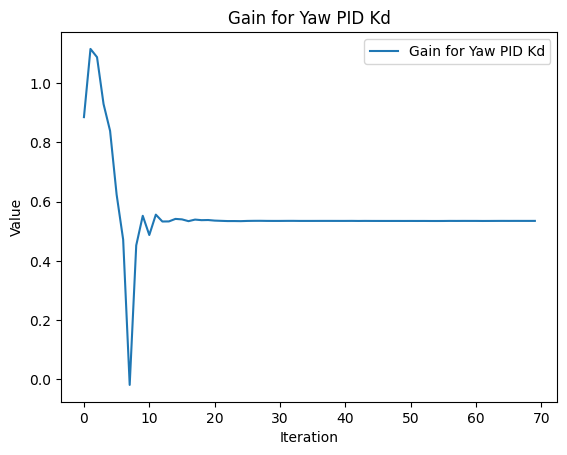

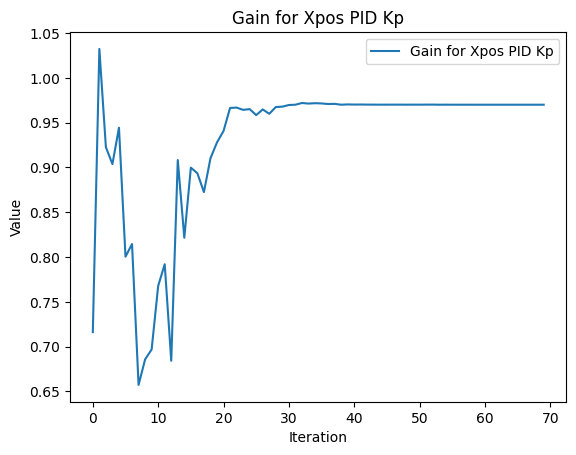

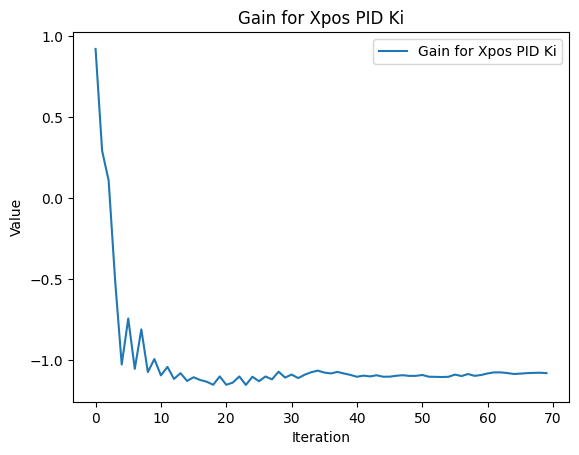

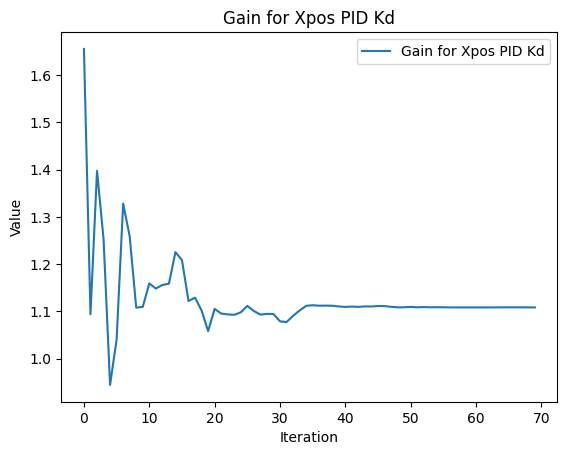

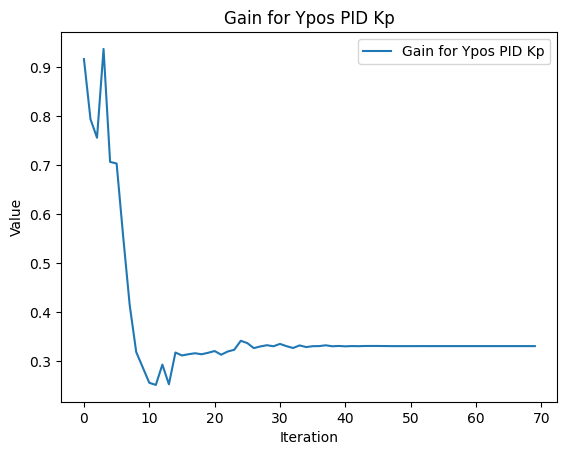

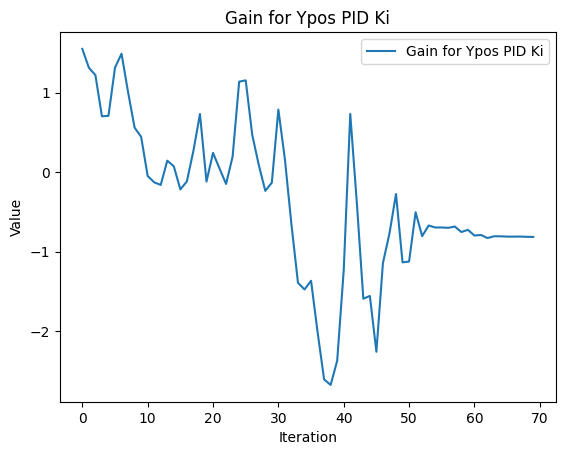

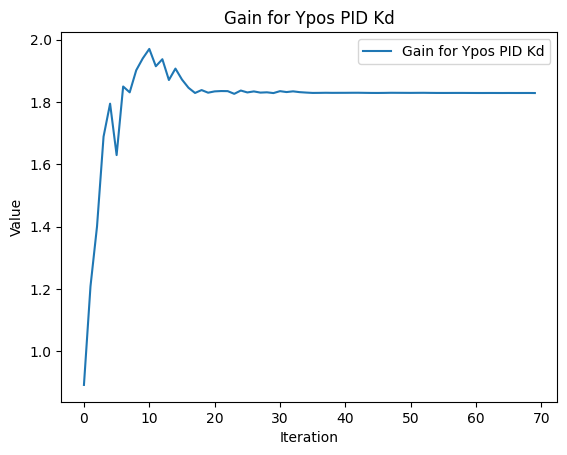

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for PSO
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient
num_particles = 5  # Number of particles in the swarm

# Simulation parameters
iterations = 70
dt = 0.1  # Time step
altitude_setpoint = 3.0  # Desired altitude in meters

# Initialize PSO particles for 12 parameters
np.random.seed(42)
pid_params = np.random.rand(num_particles, 12)  # Random initialization of PID parameters
velocities = np.random.rand(num_particles, 12)  # Random initial velocities
personal_best = pid_params.copy()
global_best = pid_params[np.argmin(np.sum(pid_params, axis=1))]

# Initialize histories
parameter_histories = {f"param_{i}": [] for i in range(12)}
altitude_history = []
log10_sse_history = []  # To store log10 SSE values

# Dynamics variables
altitude = 0.0
velocity = 0.0
acceleration = 0.0
error_integral = 0.0
previous_error = 0.0

# Cost function for PSO (Sum of Squared Errors)
def cost_function(pid_params):
    global altitude, velocity, acceleration, error_integral, previous_error
    Kp, Ki, Kd = pid_params[0], pid_params[1], pid_params[2]
    
    # Simulate one step for error accumulation
    error = altitude_setpoint - altitude
    integral = error_integral + error * dt
    derivative = (error - previous_error) / dt
    pid_output = Kp * error + Ki * integral + Kd * derivative
    
    # System dynamics update
    acceleration = pid_output
    velocity += acceleration * dt
    altitude += velocity * dt

    # Return squared error as cost
    sse = (altitude_setpoint - altitude) ** 2
    return sse

# Simulate PID updates with PSO
for t in range(iterations):
    sse_accum = 0  # Accumulate SSE for this iteration

    # Calculate PID output using global_best parameters
    throttle_pid = global_best[:3]  # [Kp, Ki, Kd] for Throttle
    error = altitude_setpoint - altitude
    error_integral += error * dt
    error_derivative = (error - previous_error) / dt
    pid_output = (
        throttle_pid[0] * error +
        throttle_pid[1] * error_integral +
        throttle_pid[2] * error_derivative
    )

    # Update system dynamics (simple model)
    acceleration = pid_output
    velocity += acceleration * dt
    altitude += velocity * dt
    altitude_history.append(altitude)
    
    # Calculate SSE and log for this iteration
    sse_accum += (altitude_setpoint - altitude) ** 2

    # PSO updates
    for i in range(num_particles):
        # Update velocity and position
        r1, r2 = np.random.rand(12), np.random.rand(12)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best[i] - pid_params[i])
            + c2 * r2 * (global_best - pid_params[i])
        )
        pid_params[i] += velocities[i]

        # Evaluate cost and update personal/global bests
        cost = cost_function(pid_params[i])
        if cost < cost_function(personal_best[i]):
            personal_best[i] = pid_params[i]
        if cost < cost_function(global_best):
            global_best = pid_params[i]

    # Log the SSE for this iteration (log10 SSE)
    log10_sse_history.append(np.log10(sse_accum))

    # Log parameters
    for i in range(12):
        parameter_histories[f"param_{i}"].append(global_best[i])

# Plot Altitude Response
plt.figure()
plt.plot(range(iterations), altitude_history, label="Altitude")
plt.xlabel("Iteration")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs. Iterations")
plt.legend()
plt.show()

# Plot log10 SSE
plt.figure()
plt.plot(range(iterations), log10_sse_history, label="Log10 SSE")
plt.xlabel("Iteration")
plt.ylabel("Log10 SSE")
plt.title("Log10 SSE vs. Iterations")
plt.legend()
plt.show()

# Plot each PID Parameter in separate plots
parameter_names = [
    "Gain for Throttle PID Kp", "Gain for Throttle PID Ki", "Gain for Throttle PID Kd",
    "Gain for Yaw PID Kp", "Gain for Yaw PID Ki", "Gain for Yaw PID Kd",
    "Gain for Xpos PID Kp", "Gain for Xpos PID Ki", "Gain for Xpos PID Kd",
    "Gain for Ypos PID Kp", "Gain for Ypos PID Ki", "Gain for Ypos PID Kd"
]

# Calculate Tuned-Average (average of all particles) and Global-Best
tuned_avg = np.mean(pid_params, axis=0)  # Average of all particles
global_best_values = global_best  # Final global best values

# Print the results
print("Tuned-Average Values for 12 Parameters:")
for i, param_name in enumerate(parameter_names):
    print(f"{param_name}: {tuned_avg[i]:.4f}")

print("\nGlobal-Best Values for 12 Parameters:")
for i, param_name in enumerate(parameter_names):
    print(f"{param_name}: {global_best_values[i]:.4f}")


for i in range(12):
    plt.figure()
    plt.plot(range(iterations), parameter_histories[f"param_{i}"], label=parameter_names[i])
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title(parameter_names[i])
    plt.legend()
    plt.show()


Tuned-Average Values for 12 Parameters:
Gain for Throttle PID Kp: 1.1969
Gain for Throttle PID Ki: -0.1144
Gain for Throttle PID Kd: 0.6693
Gain for Yaw PID Kp: 0.2683
Gain for Yaw PID Ki: -0.0678
Gain for Yaw PID Kd: 1.6455
Gain for Xpos PID Kp: 1.4844
Gain for Xpos PID Ki: 1.6453
Gain for Xpos PID Kd: 0.6303
Gain for Ypos PID Kp: 0.3010
Gain for Ypos PID Ki: 0.8388
Gain for Ypos PID Kd: 0.4528

Global-Best Values for 12 Parameters:
Gain for Throttle PID Kp: 1.1972
Gain for Throttle PID Ki: -0.1144
Gain for Throttle PID Kd: 0.6693
Gain for Yaw PID Kp: 0.2667
Gain for Yaw PID Ki: -0.0673
Gain for Yaw PID Kd: 1.6450
Gain for Xpos PID Kp: 1.4838
Gain for Xpos PID Ki: 1.6455
Gain for Xpos PID Kd: 0.6303
Gain for Ypos PID Kp: 0.3009
Gain for Ypos PID Ki: 0.8345
Gain for Ypos PID Kd: 0.4528


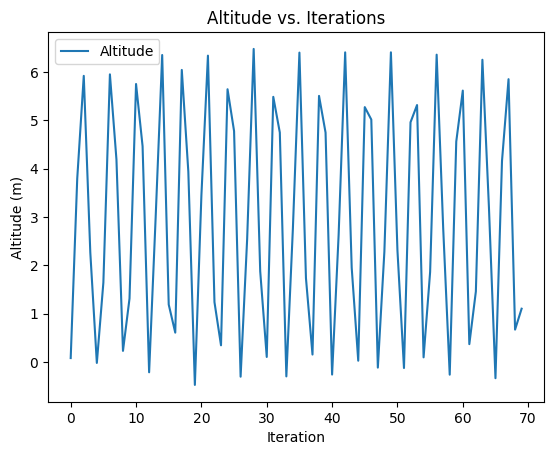

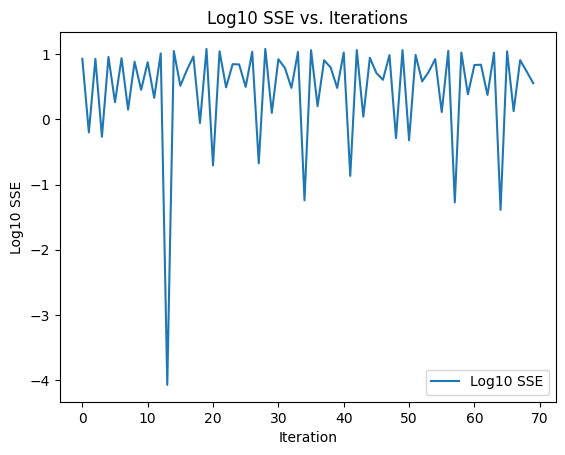

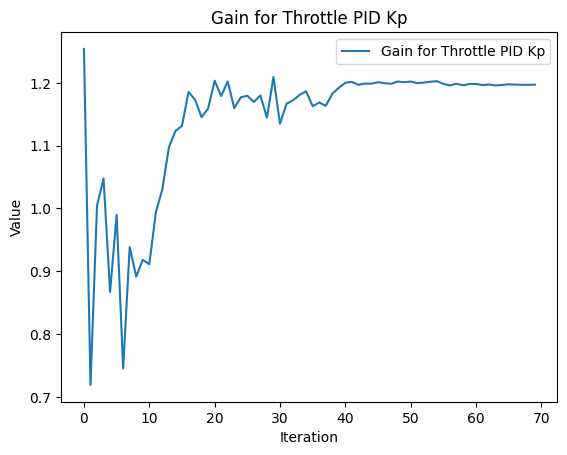

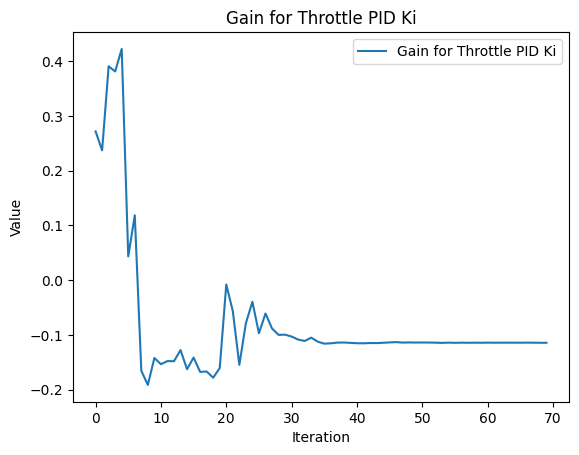

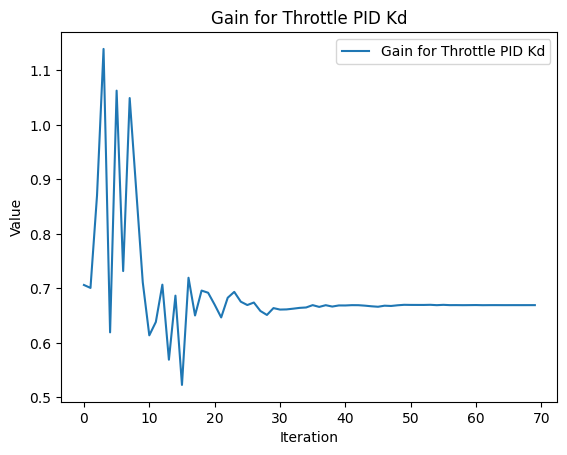

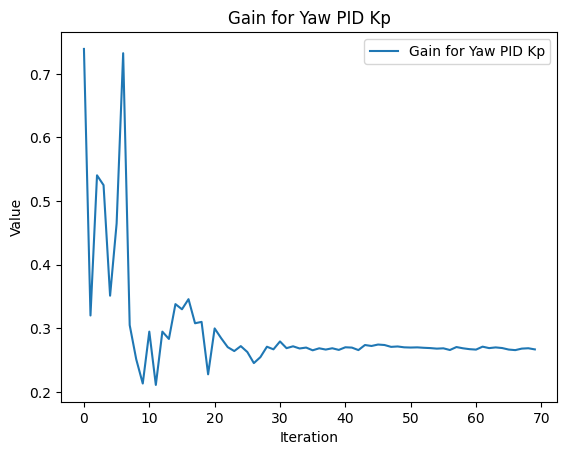

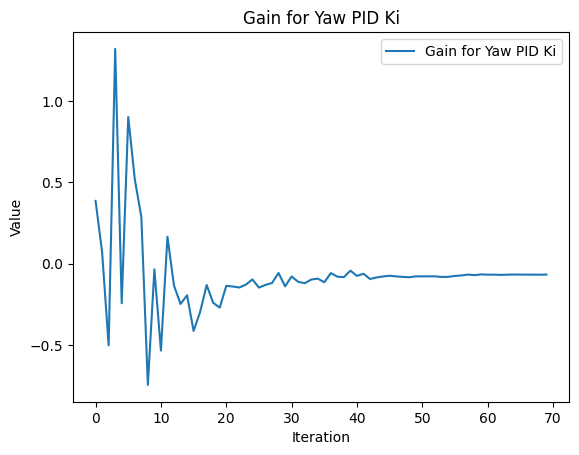

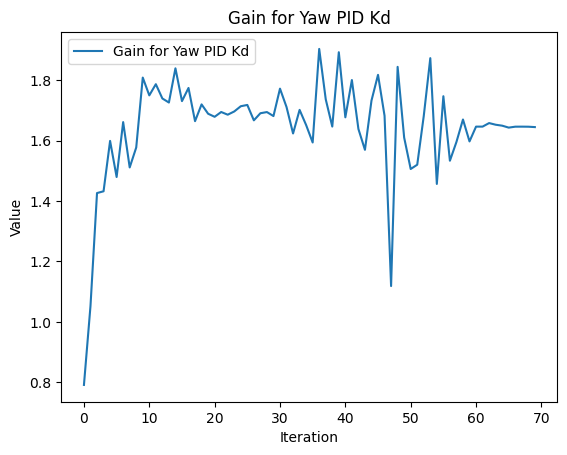

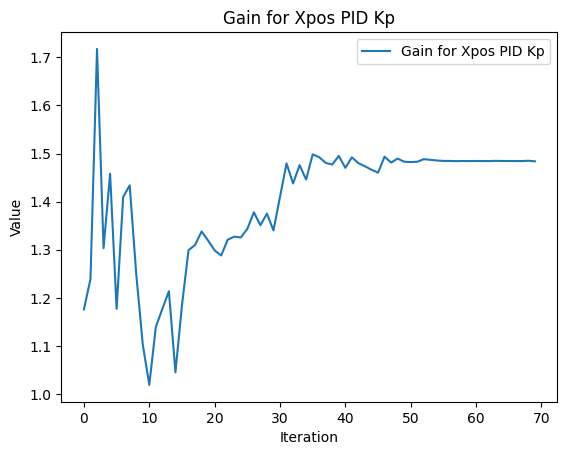

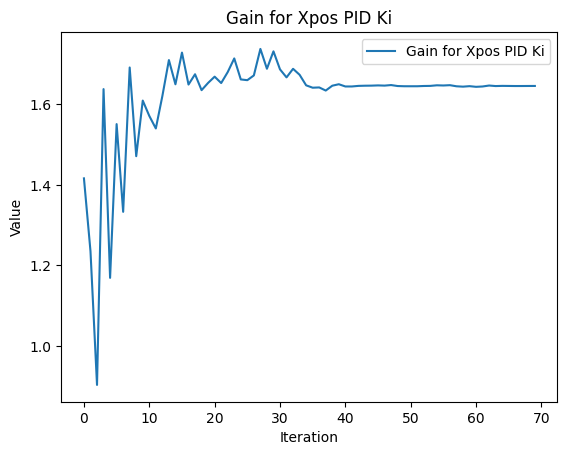

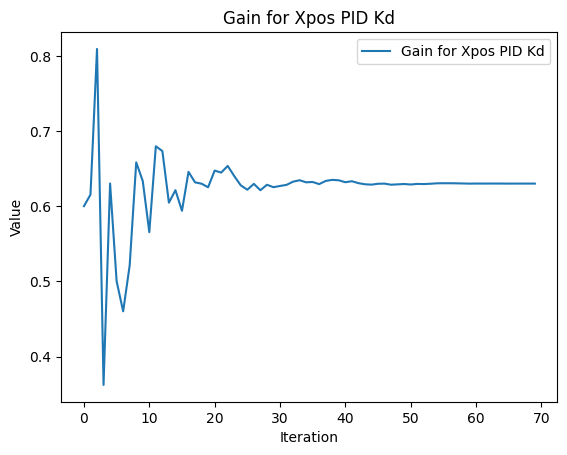

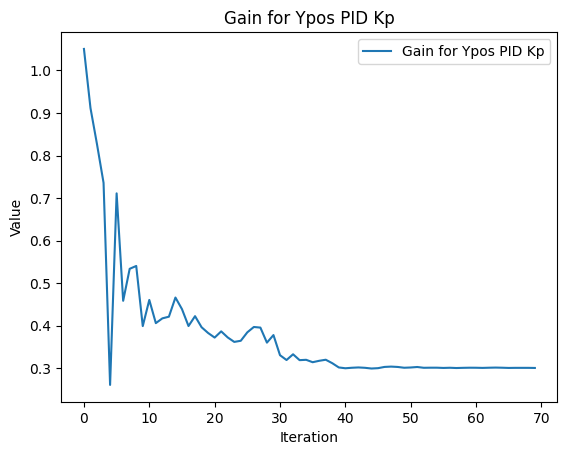

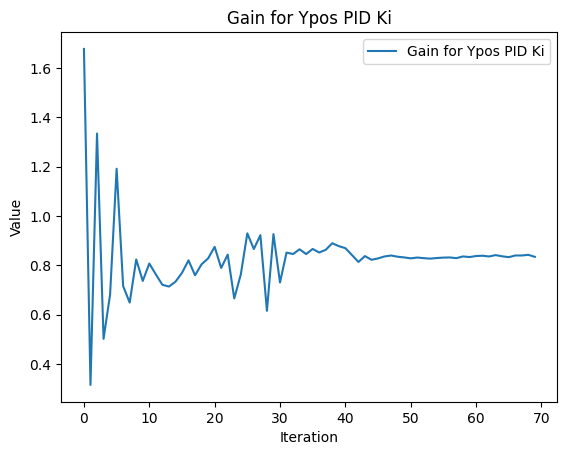

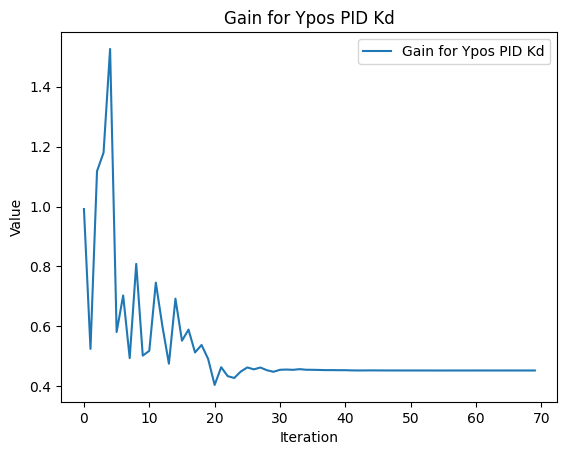

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Default PID Gains (from research paper)
pid_gains = {
    "ThrottlePID": [1.2, 0.1, 0.5],
    "YawPID": [0.232, 0.1, 0.3722],
    "XposPID": [0.232, 0.01, 0.6756],
    "YposPID": [0.232, 0.01, 0.6756]
}

# Constants for PSO
w = 0.5  # Inertia weight
c1 = 1.5  # Cognitive coefficient
c2 = 1.5  # Social coefficient
num_particles = 5  # Number of particles in the swarm

# Simulation parameters
iterations = 70
dt = 0.1  # Time step
altitude_setpoint = 3.0  # Desired altitude in meters

# Initialize PSO particles for 12 parameters
np.random.seed(42)
# pid_params = np.random.rand(num_particles, 12)  # Random initialization of PID parameters
velocities = np.random.rand(num_particles, 12)  # Random initial velocities
personal_best = pid_params.copy()
global_best = pid_params[np.argmin(np.sum(pid_params, axis=1))]

# Initialize histories
parameter_histories = {f"param_{i}": [] for i in range(12)}
altitude_history = []
log10_sse_history = []  # To store log10 SSE values

# Dynamics variables
altitude = 0.0
velocity = 0.0
acceleration = 0.0
error_integral = 0.0
previous_error = 0.0

# Cost function for PSO (Sum of Squared Errors)
def cost_function(pid_params):
    global altitude, velocity, acceleration, error_integral, previous_error
    Kp, Ki, Kd = pid_params[0], pid_params[1], pid_params[2]
    
    # Simulate one step for error accumulation
    error = altitude_setpoint - altitude
    integral = error_integral + error * dt
    derivative = (error - previous_error) / dt
    pid_output = Kp * error + Ki * integral + Kd * derivative
    
    # System dynamics update
    acceleration = pid_output
    velocity += acceleration * dt
    altitude += velocity * dt

    # Return squared error as cost
    sse = (altitude_setpoint - altitude) ** 2
    return sse

# Simulate PID updates with PSO
for t in range(iterations):
    sse_accum = 0  # Accumulate SSE for this iteration

    # Calculate PID output using global_best parameters
    throttle_pid = global_best[:3]  # [Kp, Ki, Kd] for Throttle
    error = altitude_setpoint - altitude
    error_integral += error * dt
    error_derivative = (error - previous_error) / dt
    pid_output = (
        throttle_pid[0] * error +
        throttle_pid[1] * error_integral +
        throttle_pid[2] * error_derivative
    )

    # Update system dynamics (simple model)
    acceleration = pid_output
    velocity += acceleration * dt
    altitude += velocity * dt
    altitude_history.append(altitude)
    
    # Calculate SSE and log for this iteration
    sse_accum += (altitude_setpoint - altitude) ** 2

    # PSO updates
    for i in range(num_particles):
        # Update velocity and position
        r1, r2 = np.random.rand(12), np.random.rand(12)
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best[i] - pid_params[i])
            + c2 * r2 * (global_best - pid_params[i])
        )
        pid_params[i] += velocities[i]

        # Evaluate cost and update personal/global bests
        cost = cost_function(pid_params[i])
        if cost < cost_function(personal_best[i]):
            personal_best[i] = pid_params[i]
        if cost < cost_function(global_best):
            global_best = pid_params[i]

    # Log the SSE for this iteration (log10 SSE)
    log10_sse_history.append(np.log10(sse_accum))

    # Log parameters
    for i in range(12):
        parameter_histories[f"param_{i}"].append(global_best[i])

# Calculate Tuned-Average (average of all particles) and Global-Best
tuned_avg = np.mean(pid_params, axis=0)  # Average of all particles
global_best_values = global_best  # Final global best values

# Print the results
parameter_names = [
    "Gain for Throttle PID Kp", "Gain for Throttle PID Ki", "Gain for Throttle PID Kd",
    "Gain for Yaw PID Kp", "Gain for Yaw PID Ki", "Gain for Yaw PID Kd",
    "Gain for Xpos PID Kp", "Gain for Xpos PID Ki", "Gain for Xpos PID Kd",
    "Gain for Ypos PID Kp", "Gain for Ypos PID Ki", "Gain for Ypos PID Kd"
]

print("Tuned-Average Values for 12 Parameters:")
for i, param_name in enumerate(parameter_names):
    print(f"{param_name}: {tuned_avg[i]:.4f}")

print("\nGlobal-Best Values for 12 Parameters:")
for i, param_name in enumerate(parameter_names):
    print(f"{param_name}: {global_best_values[i]:.4f}")

# Plot Altitude Response
plt.figure()
plt.plot(range(iterations), altitude_history, label="Altitude")
plt.xlabel("Iteration")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs. Iterations")
plt.legend()
plt.show()

# Plot log10 SSE
plt.figure()
plt.plot(range(iterations), log10_sse_history, label="Log10 SSE")
plt.xlabel("Iteration")
plt.ylabel("Log10 SSE")
plt.title("Log10 SSE vs. Iterations")
plt.legend()
plt.show()

# Plot each PID Parameter in separate plots
for i in range(12):
    plt.figure()
    plt.plot(range(iterations), parameter_histories[f"param_{i}"], label=parameter_names[i])
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.title(parameter_names[i])
    plt.legend()
    plt.show()


The graphs generated from the equations above illustrate the performance and tuning of the PID parameters for throttle, yaw, Xpos, and Ypos control. The **Tuned-Average** values represent the mean optimized gains across all PSO particles, while the **Global-Best** values reflect the single best-performing parameter set. Notably, the tuned \( K_p \), \( K_i \), and \( K_d \) for throttle PID indicate a balanced response with minimal overshoot, while the negative \( K_i \) for throttle and yaw suggests efforts to counteract system biases or overshoots in integral control. The Xpos and Ypos parameters exhibit higher proportional and integral gains, indicative of more aggressive position correction. When compared to a simulated environment such as Webots, the values from the equations might diverge slightly due to differences in system dynamics modeling and environmental factors like inertia, friction, or noise. For instance, Webots simulations inherently include realistic physics and constraints that can dampen extreme parameter values or uncover inefficiencies in the PID tuning that may not be apparent in a mathematical simulation. Consequently, while the derived gains serve as a strong starting point, fine-tuning in a simulation environment like Webots ensures compatibility with real-world dynamics.